In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y dataset')

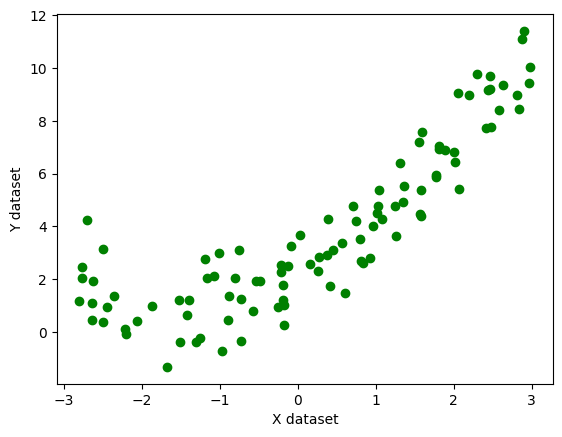

In [7]:
# Creating dataset
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)
# quadratic equation used y=0.5x^2+1.5x+2+outliers
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [9]:
# Let's implement simple linear regression
from sklearn.linear_model import LinearRegression
regresssion_1 = LinearRegression()

In [10]:
regresssion_1.fit(X_train, y_train)

LinearRegression()

In [11]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regresssion_1.predict(X_test))
print(score)

0.5531095594465649


Text(0, 0.5, 'Y')

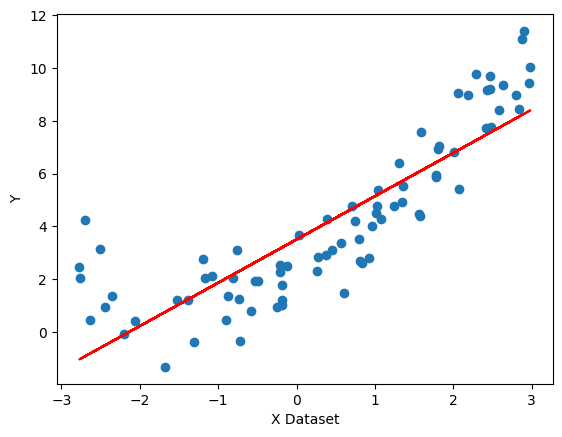

In [13]:
# Let's visualize this model
plt.plot(X_train, regresssion_1.predict(X_train), color='r')
plt.scatter(X_train, y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")

In [14]:
# Let's apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [29]:
X_train_poly

array([[ 1.00000000e+00,  2.95960178e+00,  8.75924272e+00,
         2.59238704e+01],
       [ 1.00000000e+00,  3.33188918e-02,  1.11014855e-03,
         3.69889195e-05],
       [ 1.00000000e+00,  2.41993062e+00,  5.85606419e+00,
         1.41712690e+01],
       [ 1.00000000e+00, -7.27461509e-01,  5.29200247e-01,
        -3.84972810e-01],
       [ 1.00000000e+00, -7.59221711e-01,  5.76417606e-01,
        -4.37628761e-01],
       [ 1.00000000e+00, -8.99255587e-01,  8.08660612e-01,
        -7.27192573e-01],
       [ 1.00000000e+00,  6.03070401e-01,  3.63693909e-01,
         2.19333031e-01],
       [ 1.00000000e+00, -5.33283000e-01,  2.84390758e-01,
        -1.51660757e-01],
       [ 1.00000000e+00,  2.05468216e+00,  4.22171879e+00,
         8.67429030e+00],
       [ 1.00000000e+00, -4.86637937e-01,  2.36816482e-01,
        -1.15243884e-01],
       [ 1.00000000e+00, -8.07076019e-01,  6.51371700e-01,
        -5.25706479e-01],
       [ 1.00000000e+00, -2.76624841e+00,  7.65213024e+00,
      

In [30]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.7823340368679546


In [31]:
print(regression.coef_)

[[ 0.          1.6905388   0.48278909 -0.04504831]]


In [32]:
print(regression.intercept_)

[2.20901414]


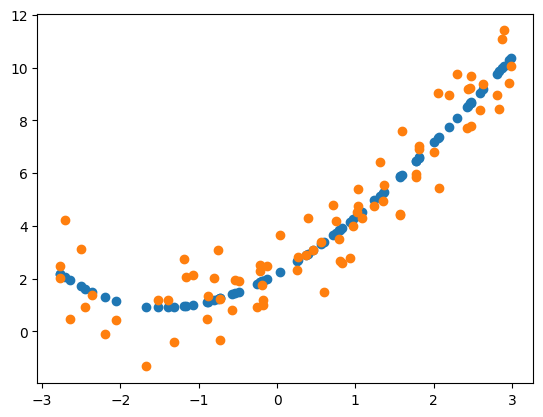

In [33]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [34]:
# Prediction of new dataset
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

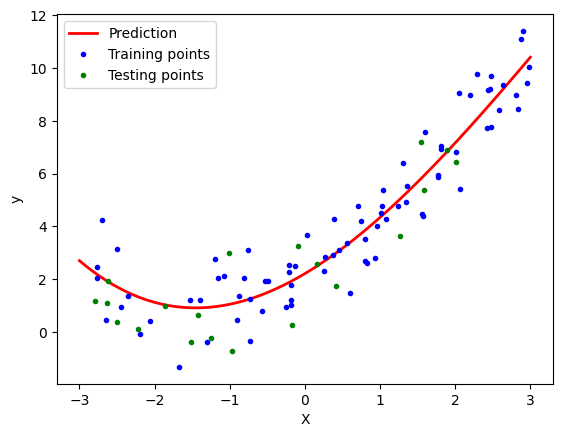

In [35]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Prediction")
plt.plot(X_train, y_train, "b.", label='Training points')
plt.plot(X_test, y_test, "g.", label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Pipeline Concepts

In [36]:
from sklearn.pipeline import Pipeline

In [37]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

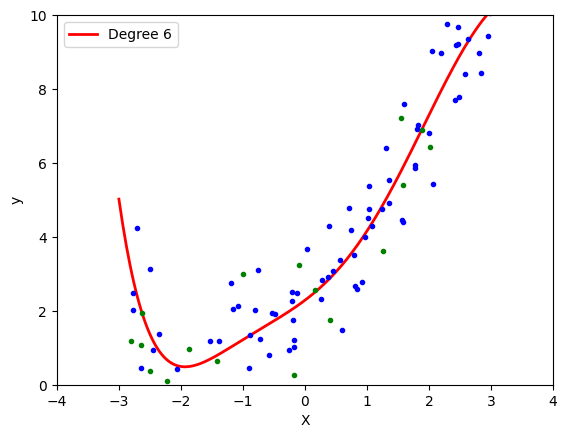

In [38]:
poly_regression(6)